In [1]:
import pandas as pd
import numpy as np
data= pd.read_csv('DelayedFlights.csv')

In this notebook, I start to clean the data to select the best model in order to get my desired result.

In [2]:
data= pd.read_csv('DelayedFlights.csv')
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Now, filtered the airport IAD on both origin(Origin) and destination(Dest)

In [4]:
df=data[(data['Origin'] == 'IAD') | (data['Dest'] == 'IAD')]
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
92,134,2008,1,3,4,1555.0,1525,2307.0,2245,WN,...,7.0,13.0,0,N,0,6.0,0.0,0.0,0.0,16.0
432,602,2008,1,3,4,809.0,800,1026.0,1010,WN,...,5.0,12.0,0,N,0,0.0,0.0,7.0,9.0,0.0
433,603,2008,1,3,4,1234.0,1220,1447.0,1425,WN,...,4.0,18.0,0,N,0,14.0,0.0,8.0,0.0,0.0


In [5]:
df.shape


(44873, 30)

In [6]:
df=df.drop(columns=['Unnamed: 0', "Year", 'Cancelled', 'CancellationCode', 'Diverted','UniqueCarrier','Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1)

In [7]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut'],
      dtype='object')

ActualElapsedTime represents the actual elapsed time for the flight and CRSElapsedTime represents the scheduled
elapsed time, we have AirTime, ArrDelay so no new information is given on the CRSElapsedTime. Also, the columns 
FlightNum, TailNum are not needed.

In [8]:
df=df.drop(columns=['CRSElapsedTime','FlightNum','TailNum'], axis=1)
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,1,3,4,2003.0,1955,2211.0,2225,128.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0
1,1,3,4,754.0,735,1002.0,1000,128.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0
92,1,3,4,1555.0,1525,2307.0,2245,252.0,232.0,22.0,30.0,LAS,IAD,2066,7.0,13.0
432,1,3,4,809.0,800,1026.0,1010,137.0,120.0,16.0,9.0,MCO,IAD,758,5.0,12.0
433,1,3,4,1234.0,1220,1447.0,1425,133.0,111.0,22.0,14.0,MCO,IAD,758,4.0,18.0


Check all the NAN values and drop them since I would like create a new dummy columns after this step.

In [9]:
nan_values=df.isnull().sum()
nan_values

Month                  0
DayofMonth             0
DayOfWeek              0
DepTime                0
CRSDepTime             0
ArrTime              122
CRSArrTime             0
ActualElapsedTime    142
AirTime              142
ArrDelay             142
DepDelay               0
Origin                 0
Dest                   0
Distance               0
TaxiIn               122
TaxiOut                9
dtype: int64

In [10]:
 df=df.dropna()

Add a dummy column based on ArrDelay time. In this case we are trying yo predict if a flight will have a delay in its arrival or not.

In [11]:
df['Delayed']= [1 if x>10 else 0 for x in df['ArrDelay']]
df.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Delayed
0,1,3,4,2003.0,1955,2211.0,2225,128.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0
1,1,3,4,754.0,735,1002.0,1000,128.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0
92,1,3,4,1555.0,1525,2307.0,2245,252.0,232.0,22.0,30.0,LAS,IAD,2066,7.0,13.0,1
432,1,3,4,809.0,800,1026.0,1010,137.0,120.0,16.0,9.0,MCO,IAD,758,5.0,12.0,1
433,1,3,4,1234.0,1220,1447.0,1425,133.0,111.0,22.0,14.0,MCO,IAD,758,4.0,18.0,1
540,1,3,4,2217.0,2110,47.0,2350,90.0,73.0,57.0,67.0,MDW,IAD,577,5.0,12.0,1
541,1,3,4,1544.0,1405,1825.0,1650,101.0,81.0,95.0,99.0,MDW,IAD,577,5.0,15.0,1
542,1,3,4,1939.0,1915,2216.0,2155,97.0,78.0,21.0,24.0,MDW,IAD,577,5.0,14.0,1
543,1,3,4,647.0,640,931.0,915,104.0,84.0,16.0,7.0,MDW,IAD,577,5.0,15.0,1
1611,1,3,4,2021.0,1825,2234.0,2035,133.0,121.0,119.0,116.0,TPA,IAD,810,4.0,8.0,1


In [12]:
def calc_prevalence(x):
    return(sum(x))/ (len(x))
print(calc_prevalence(df['Delayed'].values).round(2))

0.74


We need two dummy columns to test which binary classification model is better fit to our analysis. Add second dummy column based on Origin.

In [13]:
df['Airport']= [1 if x=='IAD' else 0 for x in df['Origin']]
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Delayed,Airport
0,1,3,4,2003.0,1955,2211.0,2225,128.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,1
1,1,3,4,754.0,735,1002.0,1000,128.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,1
92,1,3,4,1555.0,1525,2307.0,2245,252.0,232.0,22.0,30.0,LAS,IAD,2066,7.0,13.0,1,0
432,1,3,4,809.0,800,1026.0,1010,137.0,120.0,16.0,9.0,MCO,IAD,758,5.0,12.0,1,0
433,1,3,4,1234.0,1220,1447.0,1425,133.0,111.0,22.0,14.0,MCO,IAD,758,4.0,18.0,1,0


In [14]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay',
       'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Delayed',
       'Airport'],
      dtype='object')

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
a=df.drop_duplicates(subset='Origin', keep='last')
names=list(a.Origin)
values=list(a.ArrDelay)
fig, axs = plt.subplots(figsize=(40, 10), sharey=True)
axs.bar(names, values)




<BarContainer object of 70 artists>

In [16]:
df.groupby(['Delayed'])['Airport'].count()


Delayed
0    11655
1    33076
Name: Airport, dtype: int64

We have 33076 flights are delayed in IAD, which means if a plane land after 10 minutes than the scheduled time 
called this flight is delayed, and 11655 flights are not delayed in our case.

Ready to split our data into the test and training set for modeling. Let's choose what X and y after splitting 
data. The main question is how we choose X!

In [17]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay',
       'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Delayed',
       'Airport'],
      dtype='object')

In [18]:
X= df[['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'AirTime','Distance', 'TaxiIn', 'TaxiOut', 'Airport']]
y=df['Delayed']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.8, random_state=1234)
X_train


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,Airport
793823,5,24,6,1659.0,1645,1831.0,1829,92.0,76.0,413,2.0,14.0,1
609453,4,1,2,1644.0,1425,1748.0,1538,64.0,43.0,239,11.0,10.0,0
1335230,8,28,4,1919.0,1846,2127.0,2059,128.0,106.0,758,6.0,16.0,0
1452560,9,20,6,645.0,604,740.0,708,55.0,40.0,177,5.0,10.0,0
1450724,9,9,2,1312.0,1246,1432.0,1401,80.0,63.0,288,3.0,14.0,1
1918857,12,21,7,818.0,725,1204.0,1002,406.0,371.0,2277,5.0,30.0,1
1787095,12,27,6,2015.0,1805,2155.0,1939,100.0,59.0,321,9.0,32.0,1
1335884,8,29,5,1849.0,1843,2051.0,2100,122.0,108.0,810,4.0,10.0,0
1308040,8,26,2,1955.0,1926,2110.0,2101,75.0,60.0,372,6.0,9.0,0
1565368,10,5,7,1045.0,831,1331.0,1120,106.0,79.0,589,6.0,21.0,0


We need to do standardization for the data to make all data into the same scale which means converting mean to 0 and std to 1.

In [20]:
from sklearn.preprocessing import StandardScaler


In [21]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


K_Nearest Neighbors algorithm is an easy to implement using the Python. We need only the value of K, which represents how many neighbors, and p represents Manhattan Distance Algorithm. 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10, p=1)

Let's predict the test set results

In [23]:
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
y_predict_knn


array([1, 1, 0, ..., 1, 0, 1])

Now, create a confusion matrix which depicting the accuracy of our model's prediction.

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix_knn= confusion_matrix(y_test, y_predict_knn)
confusion_matrix_knn


array([[1133, 1200],
       [ 878, 5736]])

In [25]:
tp = confusion_matrix_knn[0][0]
fp = confusion_matrix_knn[0][1]
fn = confusion_matrix_knn[1][0]
tn = confusion_matrix_knn[1][1]

In [26]:
tpr_knn= tp/(tp+fn)
fpr_knn=fp/(tn+fp)

In the above cell, on the top left entry represents True Positive, on the top right entry represents False Positive, on the left bottom represents False Negative and on the right bottom resprents True negative.

In [44]:
knn_score = knn.score(X_test,y_test)
knn_score


0.7677433776684922

The model is approximately 77% accurate to predict whether the flight will be delayed or not. This model does not
have an high accuracy and also it is not enough to check accuracy score if the dateset is not balanced. Therefore,let's find recall and precision to make sure that whether I am not going to use this model to obtain my goal or try another models.

In [28]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [29]:
knn_precision=precision_score(y_test, y_predict_knn)
knn_recall= recall_score(y_test, y_predict_knn)
print(knn_precision)
print(knn_recall)

0.8269896193771626
0.8672512851527063


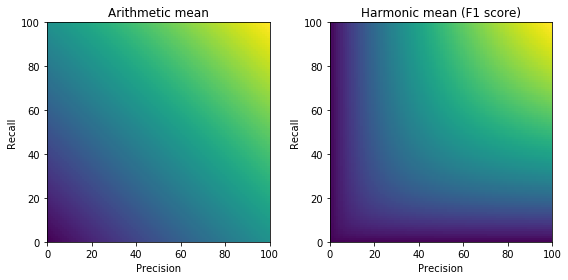

In [30]:
n = 100
precisions = np.linspace(0 + 1 / n, 1, n)
recalls = np.linspace(0 + 1 / n, 1, n)

# Arithmetic mean.
am = np.array([np.mean([p, r]) for p in precisions for r in recalls]).reshape(n, n)

# Harmonic mean.
f1 = np.array([2 * p * r / (p + r) for p in precisions for r in recalls]).reshape(n, n)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].pcolor(am)
ax[1].pcolor(f1)

ax[0].set_title('Arithmetic mean')
ax[0].set_xlabel('Precision')
ax[0].set_ylabel('Recall')
ax[1].set_title('Harmonic mean (F1 score)')
ax[1].set_xlabel('Precision')
ax[1].set_ylabel('Recall')

plt.tight_layout()
plt.show()

In [31]:
y_test.groupby(y_test).count()

Delayed
0    2333
1    6614
Name: Delayed, dtype: int64

In [32]:
from sklearn.tree import DecisionTreeClassifier
d_tree= DecisionTreeClassifier(max_depth=10)
d_tree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
y_predict_tree = d_tree.predict(X_test)
y_predict_tree

array([1, 1, 0, ..., 1, 1, 1])

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix_tree= confusion_matrix(y_test, y_predict_tree)
confusion_matrix_tree


array([[ 839, 1494],
       [ 209, 6405]])

In [35]:
tp = confusion_matrix_tree[0][0]
fp = confusion_matrix_tree[0][1]
fn = confusion_matrix_tree[1][0]
tn = confusion_matrix_tree[1][1]

In [36]:
tpr_tree= tp/(tp+fn)
fpr_tree=fp/(tn+fp)

In [37]:
tree_score = d_tree.score(X_test,y_test)
tree_score

0.8096568682239857

In [45]:
tree_precision=precision_score(y_test, y_predict_tree)
tree_recall= recall_score(y_test, y_predict_tree)
print(tree_precision)
print(tree_recall)

0.8108621344473984
0.9684003628666465


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_tree))
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.80      0.36      0.50      2333
           1       0.81      0.97      0.88      6614

   micro avg       0.81      0.81      0.81      8947
   macro avg       0.81      0.66      0.69      8947
weighted avg       0.81      0.81      0.78      8947

              precision    recall  f1-score   support

           0       0.56      0.49      0.52      2333
           1       0.83      0.87      0.85      6614

   micro avg       0.77      0.77      0.77      8947
   macro avg       0.70      0.68      0.68      8947
weighted avg       0.76      0.77      0.76      8947



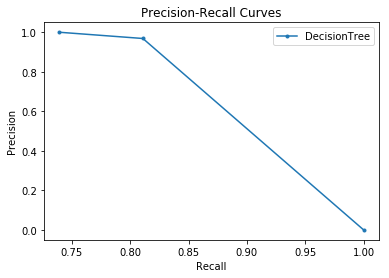

0.8085989706366126

In [40]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot 
from sklearn import metrics
tn,fp,fn,tp= confusion_matrix_tree.ravel()


tree_precision, tree_recall, thresholds = precision_recall_curve(y_test,y_predict_tree)

plt.plot(tree_precision,tree_recall, marker='.',label='DecisionTree')

# axis labels
pyplot.title('Precision-Recall Curves')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

plt.show()
plt.close()
metrics.average_precision_score(y_test,y_predict_tree)

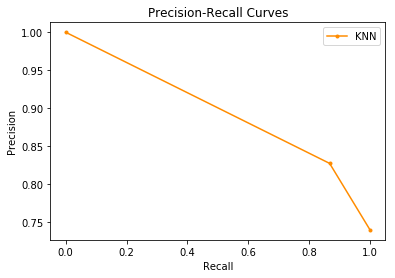

0.8153412627667205

In [41]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot 
from sklearn import metrics


tn,fp,fn,tp=confusion_matrix_knn.ravel()
knn_precision, knn_recall, thresholds = metrics.precision_recall_curve(y_test,y_predict_knn)

pyplot.plot(knn_recall, knn_precision,marker='.', label='KNN', color="darkorange")
# axis labels
pyplot.title('Precision-Recall Curves')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

plt.show()
plt.close()
metrics.average_precision_score(y_test,y_predict_knn)

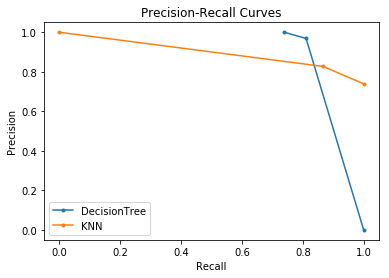

0.8153412627667205
0.8085989706366126


In [42]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot 
from sklearn import metrics

tn,fp,fn,tp= confusion_matrix_tree.ravel()
tn,fp,fn,tp=confusion_matrix_knn.ravel()

tree_precision, tree_recall, thresholds = precision_recall_curve(y_test,y_predict_tree)
knn_precision, knn_recall, thresholds = metrics.precision_recall_curve(y_test,y_predict_knn)

plt.plot(tree_precision,tree_recall, marker='.',label='DecisionTree')
pyplot.plot(knn_recall, knn_precision,marker='.', label='KNN')
# axis labels
pyplot.title('Precision-Recall Curves')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

plt.show()
plt.close()
print(metrics.average_precision_score(y_test,y_predict_knn))
print(metrics.average_precision_score(y_test,y_predict_tree))

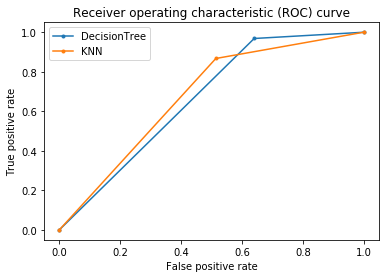

0.6764460454910552
0.6640115830621274


In [43]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot 
from sklearn import metrics

tn,fp,fn,tp= confusion_matrix_tree.ravel()
tn,fp,fn,tp=confusion_matrix_knn.ravel()

fpr_tree, tpr_tree, thresholds = metrics.roc_curve(y_test,y_predict_tree)
fpr_knn,tpr_knn, thresholds = metrics.roc_curve(y_test,y_predict_knn)

plt.plot(fpr_tree,tpr_tree, marker='.',label='DecisionTree')
pyplot.plot(fpr_knn,tpr_knn,marker='.', label='KNN')
# axis labels
plt.title('Receiver operating characteristic (ROC) curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

plt.show()
plt.close()
print(metrics.roc_auc_score(y_test,y_predict_knn))
print(metrics.roc_auc_score(y_test,y_predict_tree))